In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import sklearn
from time import sleep
from tqdm import tqdm
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

# Get Data

In [2]:
! wget https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EQc79uRBeO1FqtH6ILFDx78BuuWui3DuRaBtnzTB6Aqxqg?download=1 -O data.tar

--2023-05-10 11:24:02--  https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EQc79uRBeO1FqtH6ILFDx78BuuWui3DuRaBtnzTB6Aqxqg?download=1
Resolving technionmail-my.sharepoint.com (technionmail-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to technionmail-my.sharepoint.com (technionmail-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/ploznik_campus_technion_ac_il/Documents/HW1_data/data.tar?ga=1 [following]
--2023-05-10 11:24:04--  https://technionmail-my.sharepoint.com/personal/ploznik_campus_technion_ac_il/Documents/HW1_data/data.tar?ga=1
Reusing existing connection to technionmail-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 212420608 (203M) [application/x-tar]
Saving to: ‘data.tar’

data.tar            100%[===================>] 202.58M  44.3MB/s    in 9.8s    

2023-05-10 11:24:14 (20.6 MB/s) - ‘data.tar’ saved [2

In [3]:
! tar -xvf data.tar

Streaming output truncated to the last 5000 lines.
data/train/patient_5499.psv
data/train/patient_55.psv
data/train/patient_550.psv
data/train/patient_5500.psv
data/train/patient_5501.psv
data/train/patient_5502.psv
data/train/patient_5503.psv
data/train/patient_5504.psv
data/train/patient_5505.psv
data/train/patient_5506.psv
data/train/patient_5507.psv
data/train/patient_5508.psv
data/train/patient_5509.psv
data/train/patient_551.psv
data/train/patient_5510.psv
data/train/patient_5511.psv
data/train/patient_5512.psv
data/train/patient_5513.psv
data/train/patient_5514.psv
data/train/patient_5515.psv
data/train/patient_5516.psv
data/train/patient_5517.psv
data/train/patient_5518.psv
data/train/patient_5519.psv
data/train/patient_552.psv
data/train/patient_5520.psv
data/train/patient_5521.psv
data/train/patient_5522.psv
data/train/patient_5523.psv
data/train/patient_5524.psv
data/train/patient_5525.psv
data/train/patient_5526.psv
data/train/patient_5527.psv
data/train/patient_5528.psv
da

# Data Imputaian

In [4]:
train_data_path = '/content/data/train'
train_files = os.listdir(train_data_path)

sample_df = pd.read_csv(f"{train_data_path}/{train_files[0]}", sep='|')
demographics_features = sample_df.columns[34:40]

Impute to last know value

In [5]:
patients_dfs = []

for train_file_name in train_files:
  df = pd.read_csv(f"{train_data_path}/{train_file_name}", sep='|')
  df = df.ffill()
  patient_number = train_file_name.split('_')[1].split('.')[0]
  df['patient_number'] = patient_number 
  patients_dfs.append(df)
  

# Data Exploration and Visualiztion

## Temporal Features - Vital signs

Get all Sepsis patients Ids

In [6]:
seps_patients = []
for patient in patients_dfs:
  if patient['SepsisLabel'].sum() >= 1:
    seps_patients.append(patient['patient_number'].unique()[0])

Get the aggregated data mean of every feature for every patient from the file that was created by the function "read_data"

In [7]:
df = pd.read_csv('/content/data_train333.csv')
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Phosphate_missing_percent,Potassium_missing_percent,Bilirubin_total_missing_percent,TroponinI_missing_percent,Hct_missing_percent,Hgb_missing_percent,PTT_missing_percent,WBC_missing_percent,Fibrinogen_missing_percent,Platelets_missing_percent
0,0,58.260870,92.739130,34.553913,123.739130,63.760870,39.652174,13.804348,-1.0,-1.0,...,0.956522,0.956522,1.000000,1.000000,0.956522,0.956522,1.000000,0.956522,1.0,0.956522
1,0,87.760000,100.000000,36.182400,131.260000,84.080000,61.040000,16.620000,-1.0,0.2,...,0.911765,0.911765,1.000000,1.000000,0.882353,0.882353,0.941176,0.911765,1.0,0.911765
2,0,86.864865,94.837838,36.124324,141.878378,91.864865,71.486486,17.216216,-1.0,-1.0,...,0.972973,0.945946,0.972973,1.000000,0.864865,0.864865,0.972973,0.972973,1.0,0.972973
3,0,57.090909,86.659091,32.167045,104.238636,56.545455,58.151364,15.204545,-1.0,-1.0,...,1.000000,0.954545,1.000000,0.977273,0.954545,0.954545,1.000000,0.954545,1.0,0.954545
4,0,77.808511,96.361702,35.097872,146.574468,94.893617,67.936170,16.000000,-1.0,-1.0,...,0.957447,0.957447,0.978723,1.000000,0.957447,0.957447,1.000000,0.957447,1.0,0.957447


To determine if there is a difference between vital signs of sepsis patients and non-sepsis patients, the Mann-Whitney U test was used for each vital sign.

In [8]:

for att in ['Temp', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']:
  pval = mannwhitneyu(df[df['SepsisLabel'] == 1][att].dropna(), df[df['SepsisLabel'] == 0][att].dropna()).pvalue
  print(f"Attribute: {att}, Pvalue = {round(min(pval*7, 1), 4)}, {'Reject' if pval*7 < 0.05 else 'Not Reject'}")

Attribute: Temp, Pvalue = 0.0, Reject
Attribute: O2Sat, Pvalue = 0.0, Reject
Attribute: SBP, Pvalue = 0.0, Reject
Attribute: MAP, Pvalue = 0.0, Reject
Attribute: DBP, Pvalue = 0.0, Reject
Attribute: Resp, Pvalue = 0.1203, Not Reject
Attribute: EtCO2, Pvalue = 0.0, Reject


Visualization of the vital signs by hours in the ICU with the mean as a horizontal line 

100%|██████████| 20000/20000 [00:35<00:00, 563.97it/s]


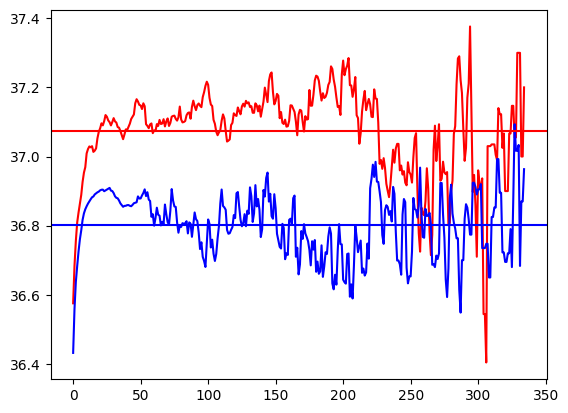

100%|██████████| 20000/20000 [00:29<00:00, 669.58it/s]


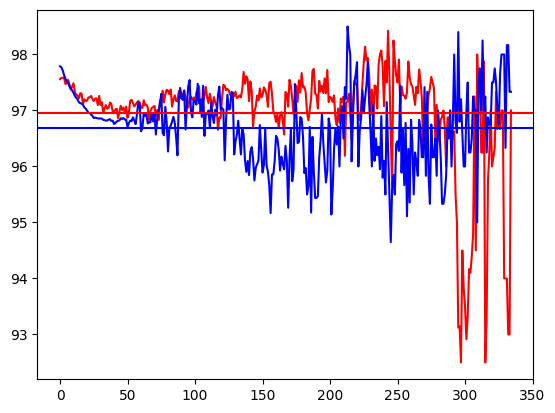

100%|██████████| 20000/20000 [00:36<00:00, 544.50it/s]


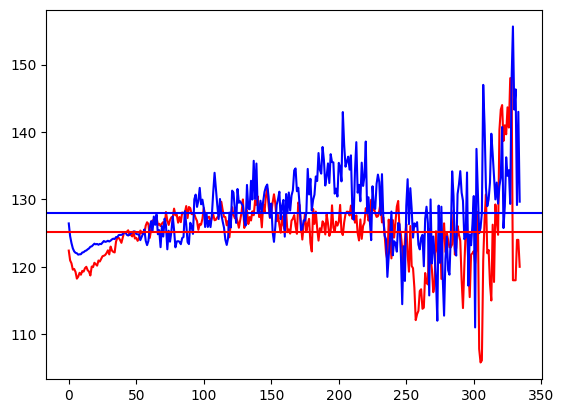

100%|██████████| 20000/20000 [00:31<00:00, 632.65it/s]


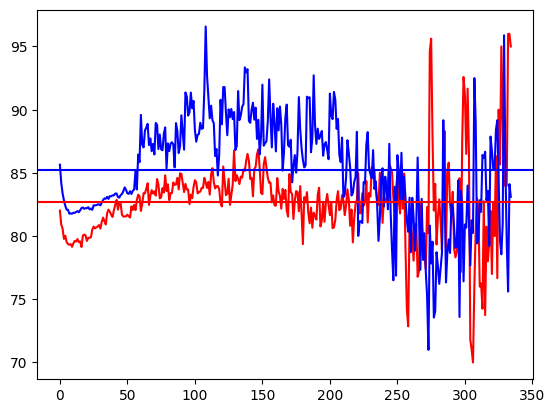

100%|██████████| 20000/20000 [00:35<00:00, 565.56it/s]


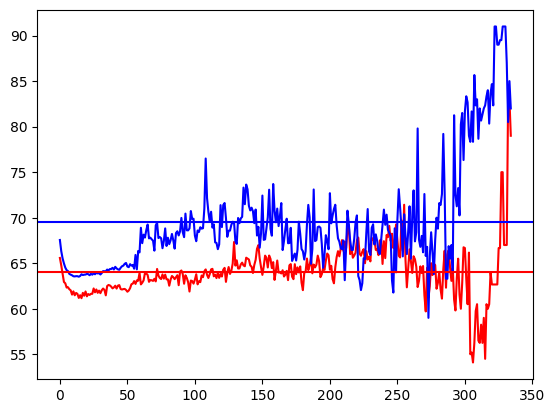

100%|██████████| 20000/20000 [00:41<00:00, 486.88it/s]


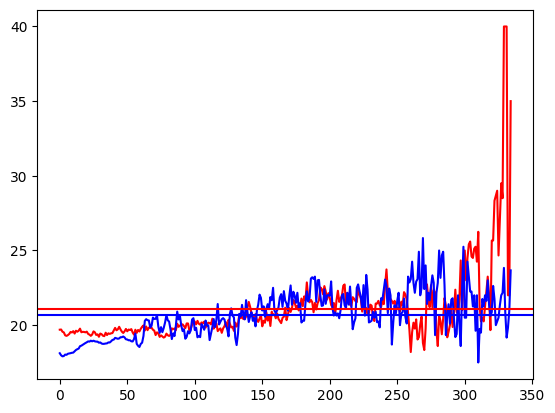

100%|██████████| 20000/20000 [00:08<00:00, 2440.91it/s]


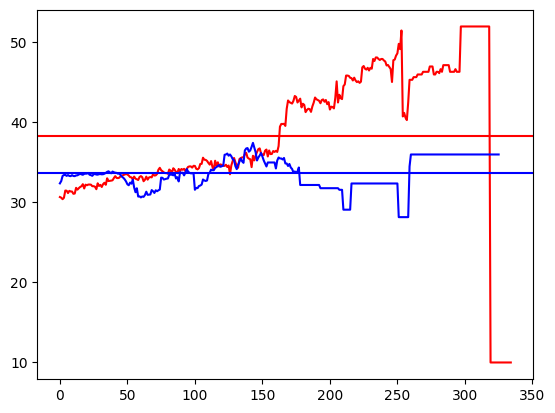

In [9]:
for feature in ['Temp', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']:
  seps_sum = [0]*400
  non_seps_sum = [0]*400
  seps_count = [0]*400
  non_seps_count = [0]*400

  for patient in tqdm(patients_dfs):
    if len(patient[feature].dropna()) == 0:
      continue
    if patient['patient_number'].unique()[0] in seps_patients:
      to_sum = patient[['ICULOS', feature]].to_numpy().T
      
      for i in range(len(to_sum[0])):
        if not np.isnan(to_sum[1][i]):
          seps_sum[int(to_sum[0][i])] += to_sum[1][i]
          seps_count[int(to_sum[0][i])] += 1

    else:
      to_sum = patient[['ICULOS', feature]].to_numpy().T
      for i in range(len(to_sum[0])):
        if not np.isnan(to_sum[1][i]):
          non_seps_sum[int(to_sum[0][i])] += to_sum[1][i]
          non_seps_count[int(to_sum[0][i])] += 1    

  for i in range(len(seps_count)):
    if seps_count[i] != 0:
      seps_sum[i] /= seps_count[i]

  for i in range(len(non_seps_count)):
      if non_seps_count[i] != 0:

        non_seps_sum[i] /= non_seps_count[i]

  seps_sum = [i for i in seps_sum if i != 0]
  non_seps_sum = [i for i in non_seps_sum if i != 0]

  plt.plot(range(len(seps_sum)), seps_sum, color = 'r')
  plt.plot(range(len(non_seps_sum)), non_seps_sum,  color = 'b')
  plt.axhline(y = sum(seps_sum)/len(seps_sum), color = 'r', linestyle = '-')
  plt.axhline(y = sum(non_seps_sum)/len(non_seps_sum), color = 'b', linestyle = '-')

  plt.show()

## Temporal Features - Laboratory values 

Creating a data frame where each row represent a patient and for each column there is 1 if the patient don't any data at every timestamp for this feature

In [11]:
missing_data_df = pd.DataFrame(columns=patients_dfs[0].columns)
number_of_columns = len(missing_data_df.columns)
for patient in patients_dfs:
  null_mask = patient.isnull()
  all_null_cols = patient.columns[null_mask.all()]

  list_row = [0] * (number_of_columns - 1) + [patient['patient_number'].unique()[0]]
  missing_data_df.loc[len(missing_data_df)] = list_row
  
  missing_data_df.loc[len(missing_data_df) - 1, all_null_cols] = 1


In [12]:
missing_data_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_number
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,15328
1,0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,6052
2,0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,7050
3,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,3950
4,0,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,2795


Visualize the data frame with a heat map

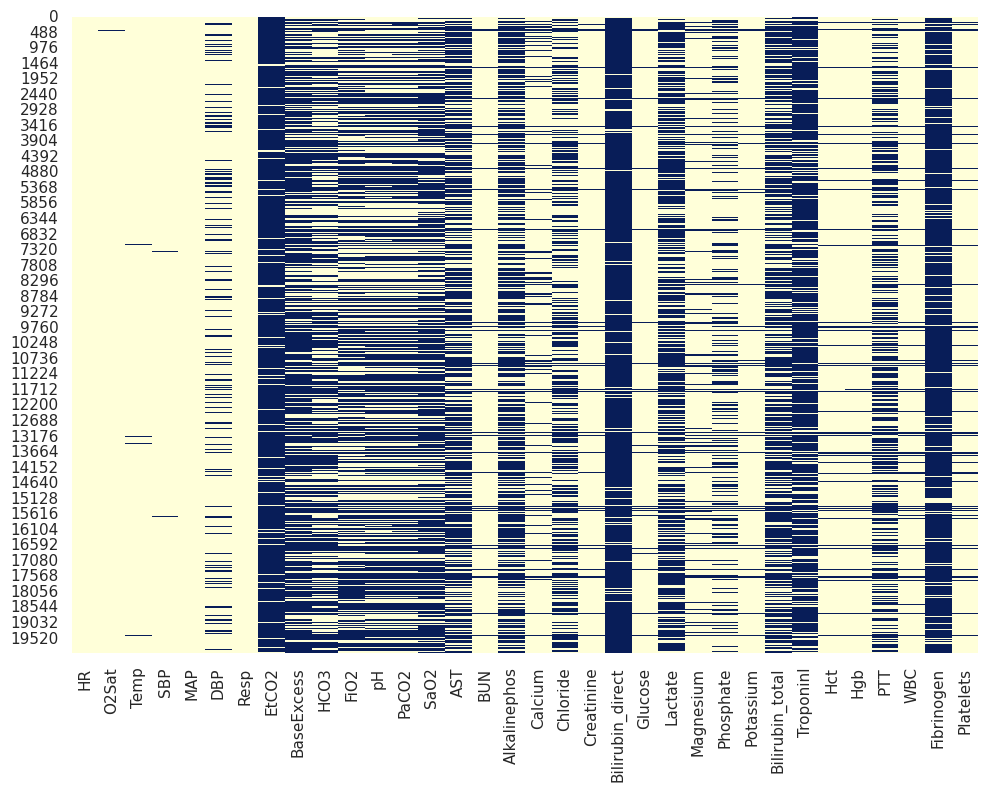

In [13]:
features_list = list(missing_data_df.columns)

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(missing_data_df[features_list[:34]], cmap='YlGnBu', cbar=False)
plt.yticklabels=[]
plt.tick_params(left=False) 
plt.show()


In [14]:
missing_data_df = missing_data_df.set_index('patient_number')
missing_data_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
patient_number,,,,,,,,,,,,,,,,,,,,,
15328,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
6052,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
7050,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
3950,0,0,0,0,0,0,0,0,1,1,...,1,1,1,0,0,0,0,0,0,0
2795,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0


visualize the data frame with a heat map for each group

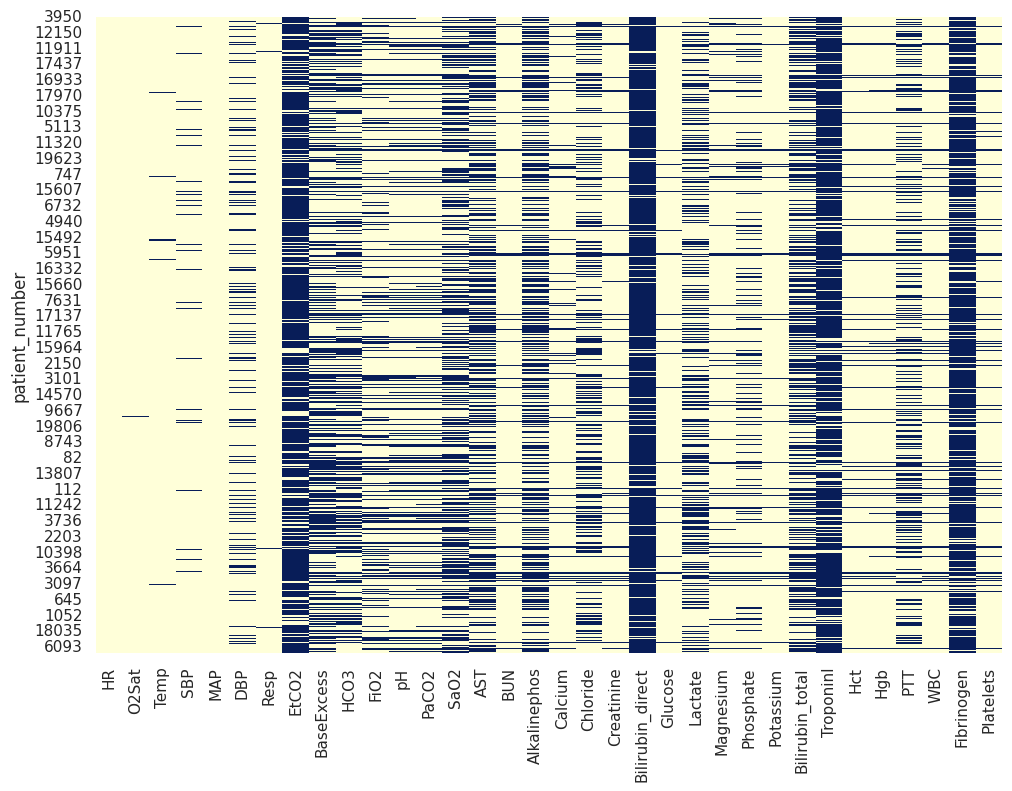

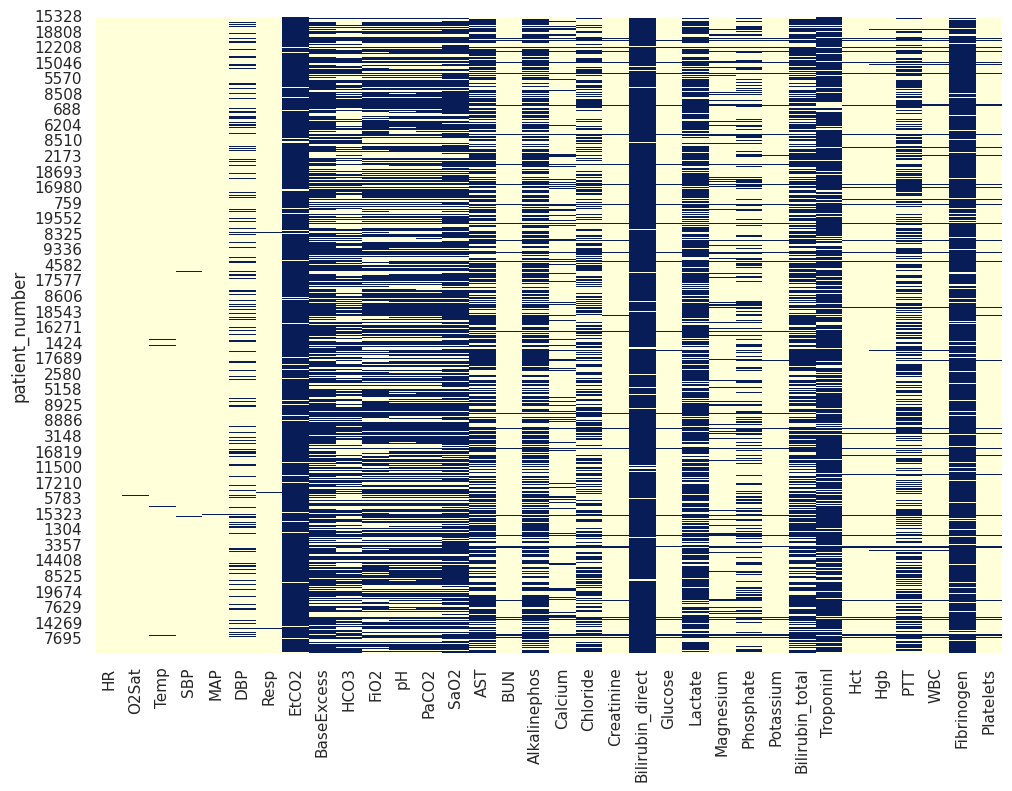

In [15]:
features_list = list(missing_data_df.columns)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(missing_data_df.loc[seps_patients][features_list[:34]], cmap='YlGnBu', cbar=False)
plt.yticklabels=[]
plt.tick_params(left=False) 
plt.show()

sns.heatmap(missing_data_df.loc[[i for i in missing_data_df.index if i not in seps_patients]][features_list[:34]], cmap='YlGnBu', cbar=False)

plt.yticklabels=[]
plt.tick_params(left=False) 
plt.show()

## Demographic features

combain all patients to one csv file

In [17]:
train_data_path = '/content/data/train'
train_files = os.listdir(train_data_path)

train_df = None 

for train_file_name in train_files:
  patient_number = train_file_name.split('_')[1].split('.')[0]
  df = pd.read_csv(f"{train_data_path}/{train_file_name}", sep='|')
  df['patient_number'] = patient_number

  df = df[df['ICULOS'] == max(df['ICULOS'])]

  if train_df is None:
    train_df = df
  else:
    train_df = pd.concat([train_df, df])

In [19]:
train_df.to_csv('/content/data_comb_for_statistics.csv')

In [21]:
train_df_one_row = pd.read_csv('/content/data_comb_for_statistics.csv', sep=',')
train_df_one_row = train_df_one_row.drop(0)
train_df_one_row = train_df_one_row.drop(columns=['Unnamed: 0'])
train_df_one_row.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_number
1,95.0,98.0,37.8,141.0,104.0,80.0,22.0,NaN,NaN,NaN,...,NaN,NaN,64.0,1,1.0,0.0,-2.45,52,0,6052
2,78.0,97.0,36.6,146.0,79.0,58.0,17.0,NaN,NaN,NaN,...,NaN,NaN,100.0,0,1.0,0.0,-59.46,50,0,7050
3,NaN,NaN,NaN,107.0,78.0,55.0,NaN,NaN,NaN,NaN,...,NaN,NaN,64.0,0,1.0,0.0,-452.35,10,1,3950
4,75.0,100.0,NaN,122.0,83.0,58.0,20.0,NaN,NaN,NaN,...,NaN,NaN,71.0,1,1.0,0.0,-3.99,40,0,2795
5,69.0,100.0,NaN,105.0,63.0,53.0,29.0,NaN,NaN,NaN,...,NaN,NaN,50.0,1,1.0,0.0,-3.27,52,0,8


In [22]:
demo_att = train_df_one_row.columns[34:40]
demo_att

Index(['Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'], dtype='object')

To determine if there is a difference between demographic features of sepsis patients and non-sepsis patients, the Mann-Whitney U test was used for each numeric feature and the Chi-squared test for the bainery features

In [25]:
for att in demo_att:
  if att in ['Age', 'HospAdmTime', 'ICULOS']:
    pval = mannwhitneyu(train_df_one_row[train_df_one_row['SepsisLabel'] == 1][att].dropna(), train_df_one_row[train_df_one_row['SepsisLabel'] == 0][att].dropna()).pvalue
    print(f"Attribute: {att}, Pvalue = {round(min(pval*6, 1), 4)}, {'Reject' if pval*6 < 0.05 else 'Not Reject'}")
  else:
    observed = [[train_df_one_row[train_df_one_row['SepsisLabel'] == 1][att].sum(), 
              len(train_df_one_row[train_df_one_row['SepsisLabel'] == 1][att]) - train_df_one_row[train_df_one_row['SepsisLabel'] == 1][att].sum()],
              [train_df_one_row[train_df_one_row['SepsisLabel'] == 0][att].sum(), 
              len(train_df_one_row[train_df_one_row['SepsisLabel'] == 0][att]) - train_df_one_row[train_df_one_row['SepsisLabel'] == 0][att].sum()]]

    chi2, p, dof, expected = chi2_contingency(observed)

    print(f"Attribute: {att}, Pvalue = {round(min(p*6, 1), 4)}, {'Reject' if p*6 < 0.05 else 'Not Reject'}")

Attribute: Age, Pvalue = 0.8141, Not Reject
Attribute: Gender, Pvalue = 0.293, Not Reject
Attribute: Unit1, Pvalue = 0.3521, Not Reject
Attribute: Unit2, Pvalue = 0.0, Reject
Attribute: HospAdmTime, Pvalue = 0.0, Reject
Attribute: ICULOS, Pvalue = 0.0131, Reject


Creating and ploting corraltion matrix

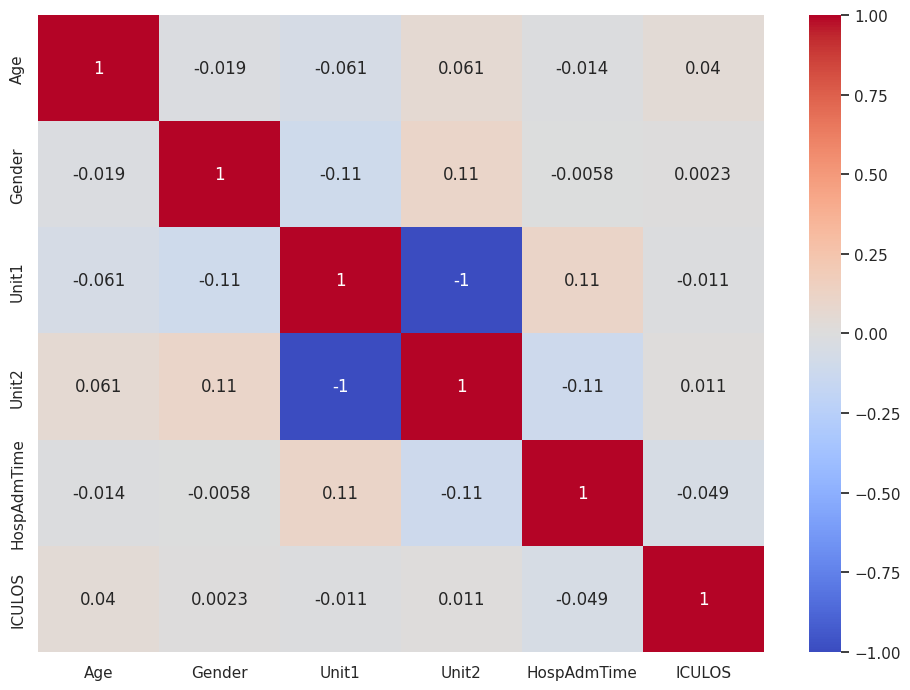

In [26]:
sns.heatmap(train_df_one_row[demo_att].corr(), cmap='coolwarm', annot=True)

plt.show()

Ploting boxplot and bar plot for each feature

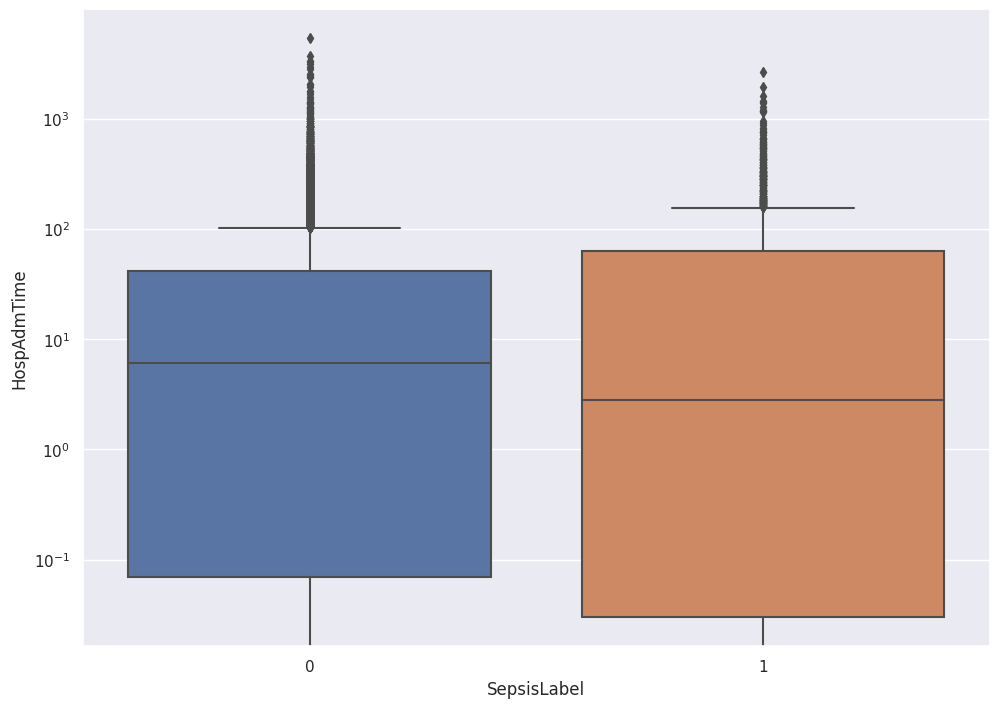

In [28]:
train_df_one_row['HospAdmTime'] = abs(train_df_one_row['HospAdmTime'])
sns.boxplot(data=train_df_one_row, x='SepsisLabel', y='HospAdmTime')
plt.yscale('log')

plt.show()

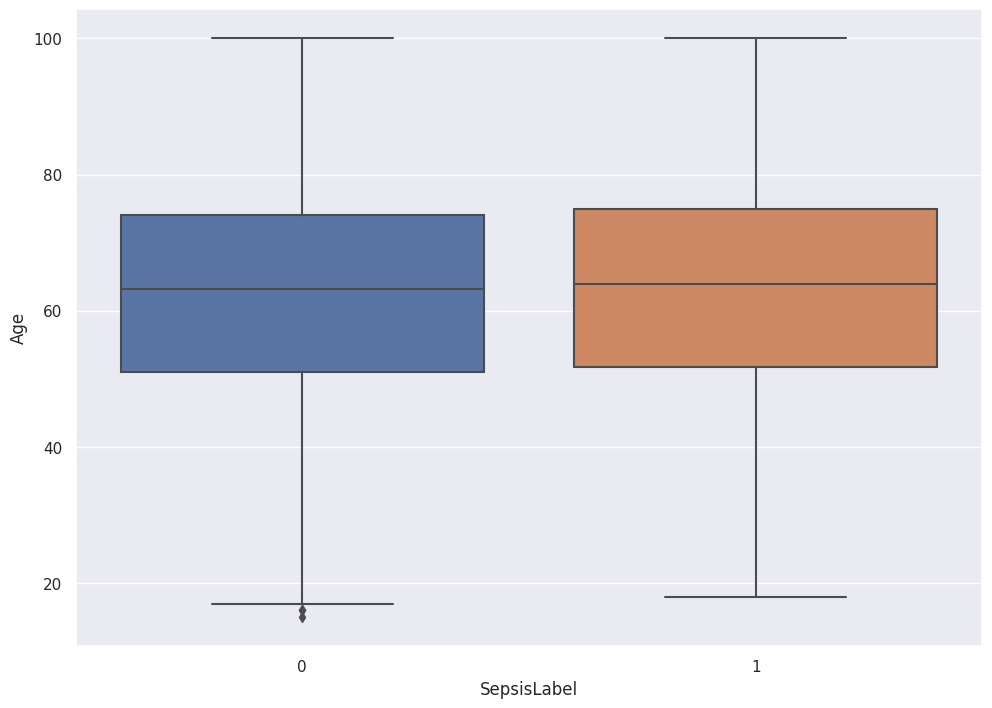

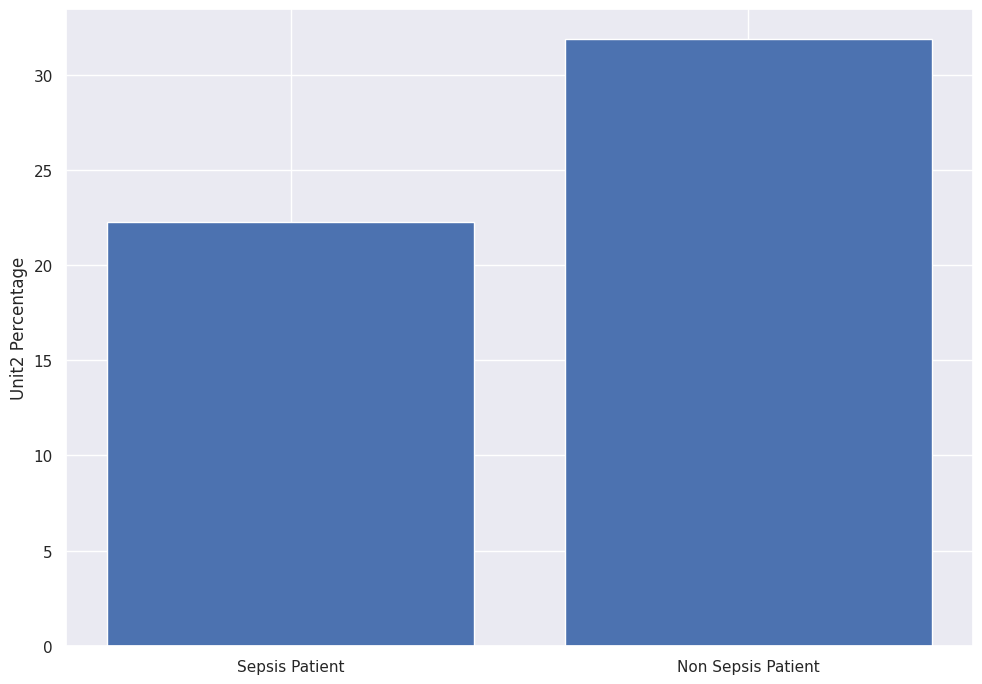

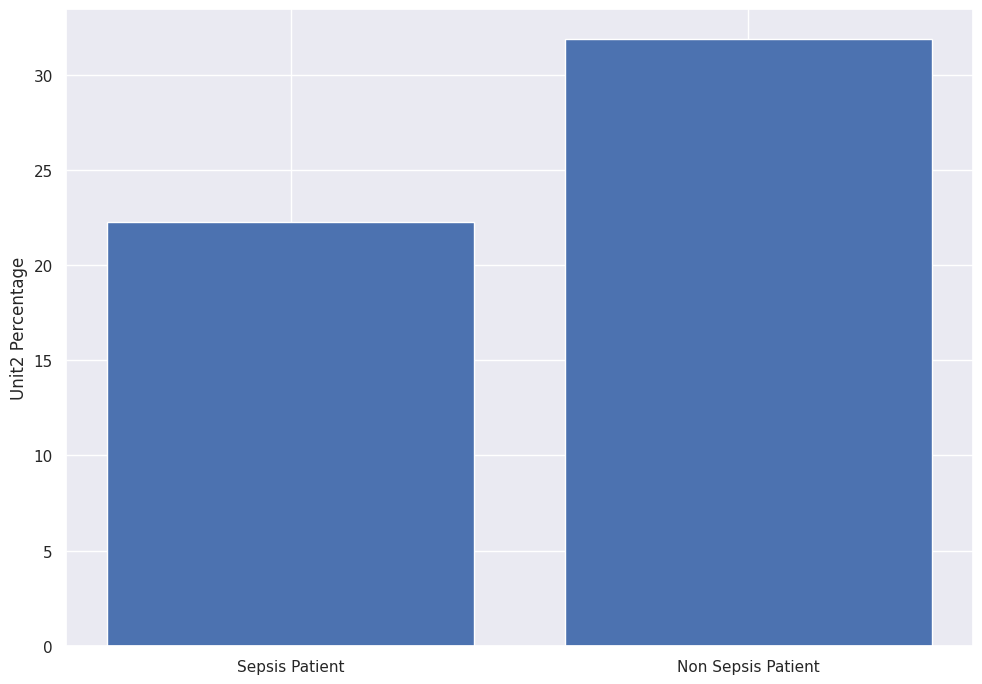

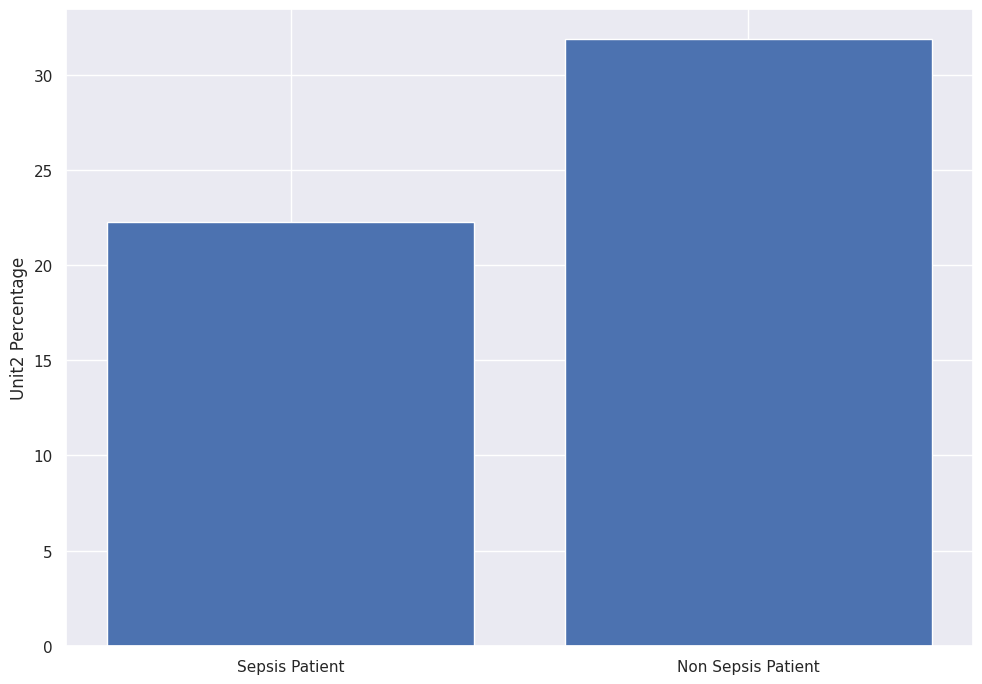

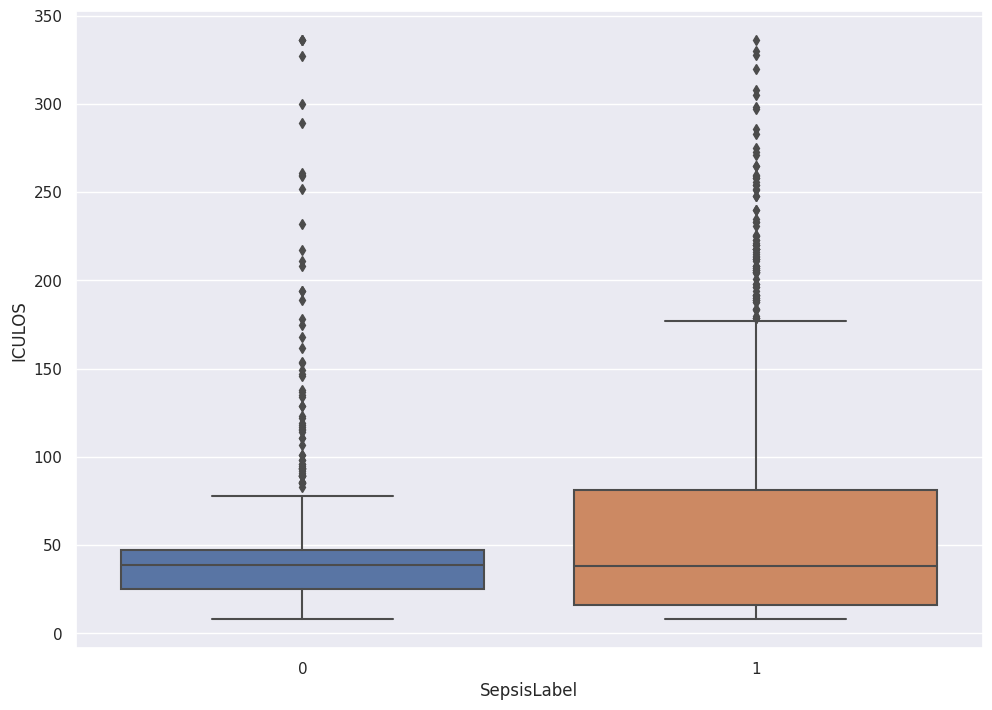

In [33]:
for att in demo_att:
  if att == 'HospAdmTime':
    continue
  if att in ['ICULOS', 'Age']:

    sns.boxplot(data=train_df_one_row, x='SepsisLabel', y=att, dodge=False)
    plt.show()

  else:
    
    plt.bar(['Sepsis Patient', 'Non Sepsis Patient'], [100*observed[0][0]/sum(observed[0]), 100*observed[1][0]/sum(observed[1])])
    plt.ylabel('Unit2 Percentage')
    plt.show()


    plt.show()